# Задание

1. Сгенерировать 3 датасета (make_classification или make_blobs)
2. Провести визуализацию
3. Провести кластеризацию
4. Для каждого метода подобрать оптимальные гипер-параметры.
5. Самостоятельно реализовать KMeans. Проверить его работу на датасетах.
6. Каждый метод оценивать 2 внешними и 2 внутренними метриками.

In [2]:
import sys
sys.path.insert(0, "C://Users//MSI//Desktop//OmSTU//MachineLearning/models//Clusterisation")

import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics.cluster import rand_score, calinski_harabasz_score

import matplotlib.pyplot as plt
from kmeansmodel import KMeansModel

# Генерация датасетов

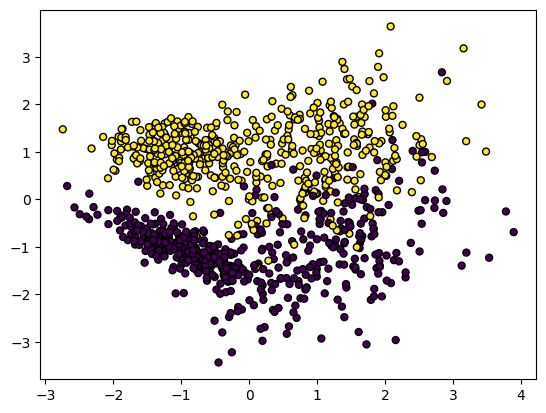

In [3]:
data_x_1, data_y_1 = make_classification(n_samples=1000, 
                                        n_classes = 2, 
                                        n_features = 2,
                                        n_redundant=0,
                                        n_clusters_per_class = 2, 
                                        flip_y=0,
                                        random_state=666)

plt.scatter(data_x_1[:, 0], data_x_1[:, 1], marker="o", c=data_y_1, s=25, edgecolor="k")
plt.show()

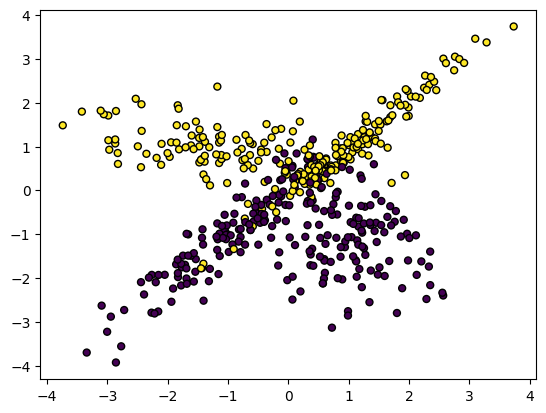

In [4]:
data_x_2, data_y_2 = make_classification(n_samples=500, 
                                        n_classes = 2, 
                                        n_features = 2,
                                        n_redundant=0,
                                        n_clusters_per_class = 2, 
                                        flip_y=0,
                                        random_state=228)

plt.scatter(data_x_2[:, 0], data_x_2[:, 1], marker="o", c=data_y_2, s=25, edgecolor="k")
plt.show()

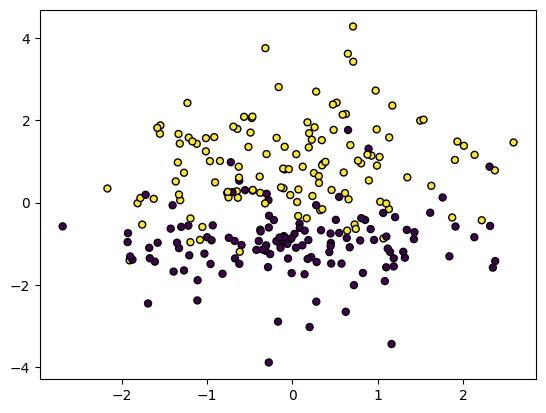

In [5]:
data_x_3, data_y_3 = make_classification(n_samples=250, 
                                        n_classes = 2, 
                                        n_features = 3,
                                        n_redundant=0,
                                        n_clusters_per_class = 2, 
                                        flip_y=0,
                                        random_state=137)

plt.scatter(data_x_3[:, 0], data_x_3[:, 1], marker="o", c=data_y_3, s=25, edgecolor="k")
plt.show()

# KMeans

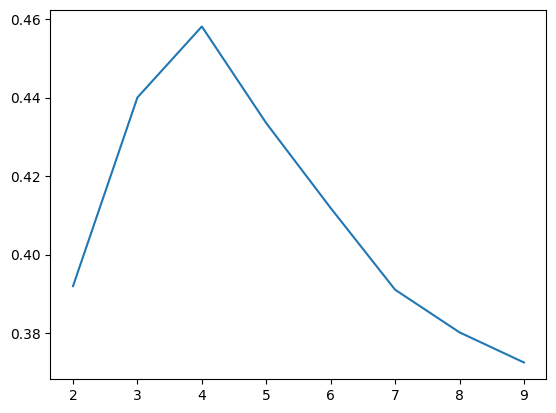

In [5]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data_x_1, KMeans(i, n_init='auto').fit(data_x_1).labels_))

plt.plot(range(2,10), ss)

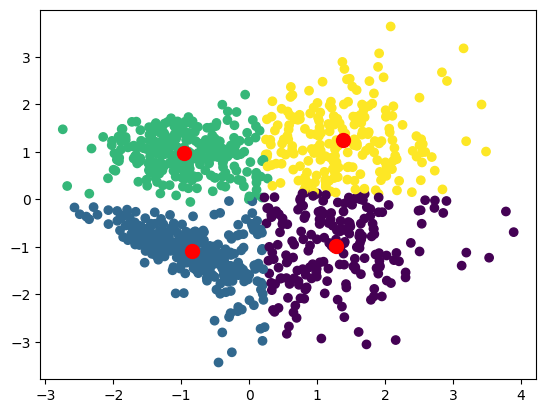

In [6]:
kmeans = KMeans(4, n_init='auto').fit(data_x_1)
plt.scatter(data_x_1[:,0], data_x_1[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [7]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_1, kmeans.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_1, kmeans.labels_))
print("Индекс Rand:\t\t\t", rand_score(kmeans.labels_, data_y_1))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(kmeans.labels_, data_y_1))

Силуэт:				 0.4576860769696763
Индекс Калинского-Харабаша:	 1046.6816321844803
Индекс Rand:			 0.7001501501501501
Индекс Adjusted Rand:		 0.4000093063078229


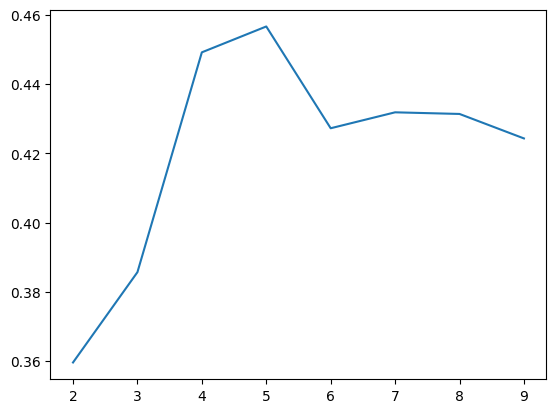

In [8]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data_x_2, KMeans(i, n_init='auto').fit(data_x_2).labels_))

plt.plot(range(2,10), ss)

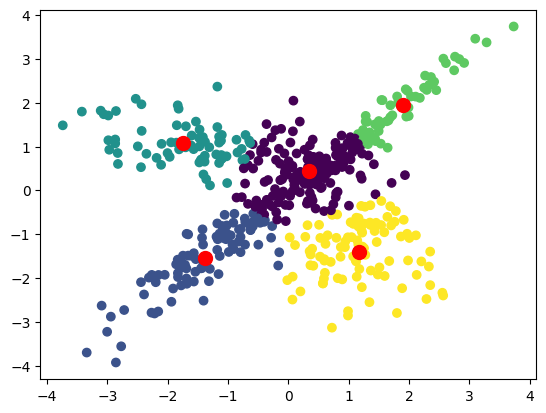

In [9]:
kmeans = KMeans(5, n_init='auto').fit(data_x_2)
plt.scatter(data_x_2[:,0], data_x_2[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [10]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_2, kmeans.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_2, kmeans.labels_))
print("Индекс Rand:\t\t\t", rand_score(kmeans.labels_, data_y_2))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(kmeans.labels_, data_y_2))

Силуэт:				 0.4579179733631217
Индекс Калинского-Харабаша:	 489.4976350287037
Индекс Rand:			 0.6059719438877755
Индекс Adjusted Rand:		 0.21111305692767784


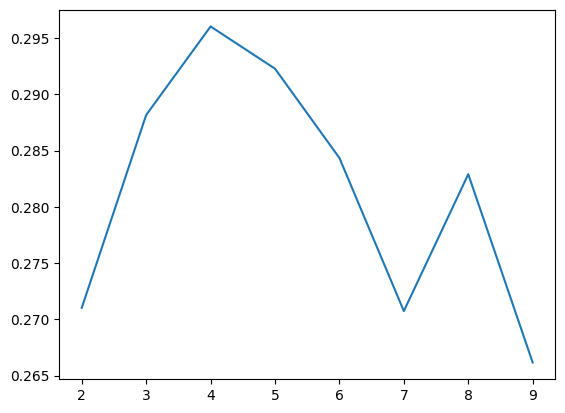

In [11]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data_x_3, KMeans(i, n_init='auto').fit(data_x_3).labels_))

plt.plot(range(2,10), ss)

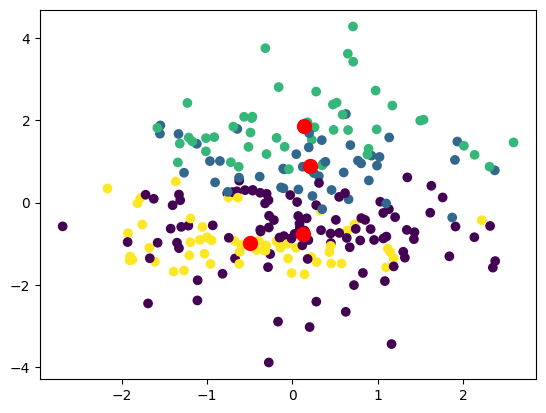

In [12]:
kmeans = KMeans(4, n_init='auto').fit(data_x_3)
plt.scatter(data_x_3[:,0], data_x_3[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [13]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_3, kmeans.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_3, kmeans.labels_))
print("Индекс Rand:\t\t\t", rand_score(kmeans.labels_, data_y_3))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(kmeans.labels_, data_y_3))

Силуэт:				 0.3012569768218378
Индекс Калинского-Харабаша:	 113.43564072496316
Индекс Rand:			 0.6257991967871486
Индекс Adjusted Rand:		 0.2502917941663916


# Affinity Propagation

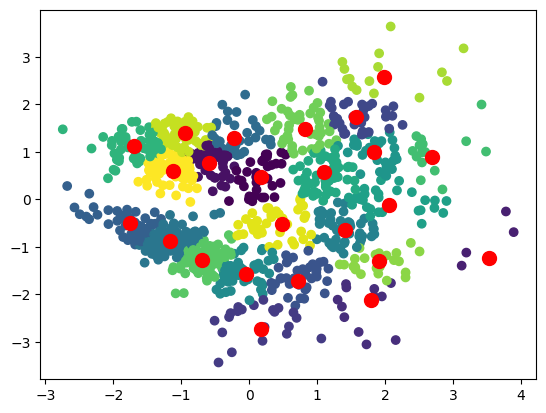

In [14]:
clustering = AffinityPropagation(preference=-7).fit(data_x_1)

plt.scatter(data_x_1[:,0], data_x_1[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

In [64]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_1, clustering.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_1, clustering.labels_))
print("Индекс Rand:\t\t\t", rand_score(clustering.labels_, data_y_1))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(clustering.labels_, data_y_1))

Силуэт:				 0.3324323027552238
Индекс Калинского-Харабаша:	 885.4212628839833
Индекс Rand:			 0.5472192192192192
Индекс Adjusted Rand:		 0.0936321896598224


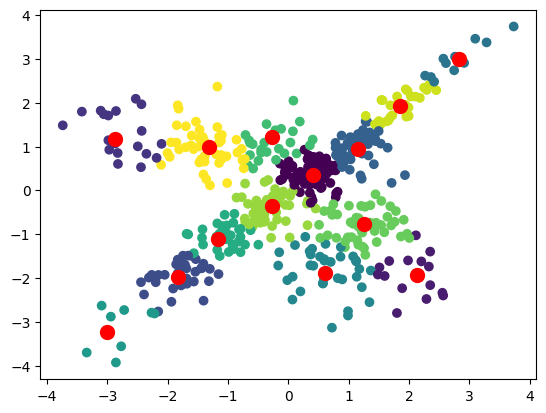

In [15]:
clustering = AffinityPropagation(preference=-11).fit(data_x_2)

plt.scatter(data_x_2[:,0], data_x_2[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

In [16]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_2, clustering.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_2, clustering.labels_))
print("Индекс Rand:\t\t\t", rand_score(clustering.labels_, data_y_2))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(clustering.labels_, data_y_2))

Силуэт:				 0.4015983851388662
Индекс Калинского-Харабаша:	 597.2547708620448
Индекс Rand:			 0.5530741482965932
Индекс Adjusted Rand:		 0.1046778455278666


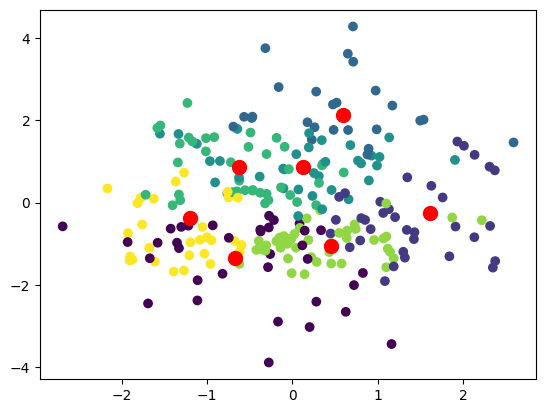

In [17]:
clustering = AffinityPropagation(preference=-50).fit(data_x_3)

plt.scatter(data_x_3[:,0], data_x_3[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

In [18]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_3, clustering.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_3, clustering.labels_))
print("Индекс Rand:\t\t\t", rand_score(clustering.labels_, data_y_3))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(clustering.labels_, data_y_3))

Силуэт:				 0.27471131237079477
Индекс Калинского-Харабаша:	 103.99666160176209
Индекс Rand:			 0.5725943775100402
Индекс Adjusted Rand:		 0.14273191963575163


# DBSCAN

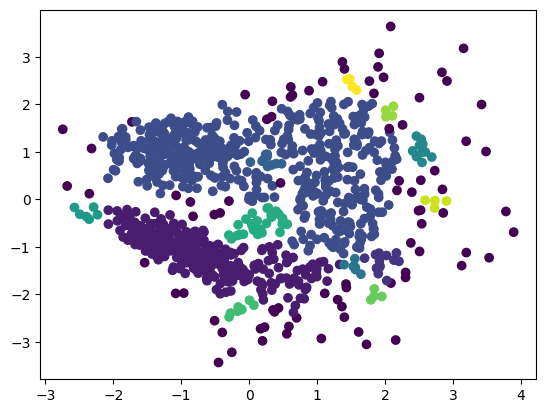

In [13]:
dbscan = DBSCAN(eps=0.2, min_samples=4).fit(data_x_1)
plt.scatter(data_x_1[:,0], data_x_1[:,1], c=dbscan.labels_)

In [14]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_1, dbscan.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_1, dbscan.labels_))
print("Индекс Rand:\t\t\t", rand_score(dbscan.labels_, data_y_1))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(dbscan.labels_, data_y_1))

Силуэт:				 -0.20718435484747028
Индекс Калинского-Харабаша:	 58.06480922859566
Индекс Rand:			 0.7083563563563564
Индекс Adjusted Rand:		 0.4165542775424556


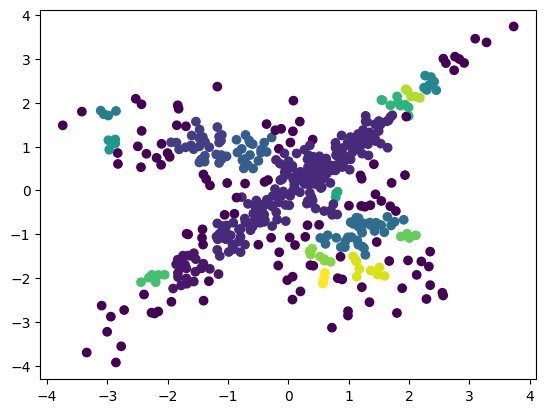

In [15]:
dbscan = DBSCAN(eps=0.2, min_samples=4).fit(data_x_2)
plt.scatter(data_x_2[:,0], data_x_2[:,1], c=dbscan.labels_)

In [16]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_2, dbscan.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_2, dbscan.labels_))
print("Индекс Rand:\t\t\t", rand_score(dbscan.labels_, data_y_2))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(dbscan.labels_, data_y_2))

Силуэт:				 -0.1717587422063856
Индекс Калинского-Харабаша:	 21.61292319578061
Индекс Rand:			 0.5172184368737475
Индекс Adjusted Rand:		 0.033473176623815756


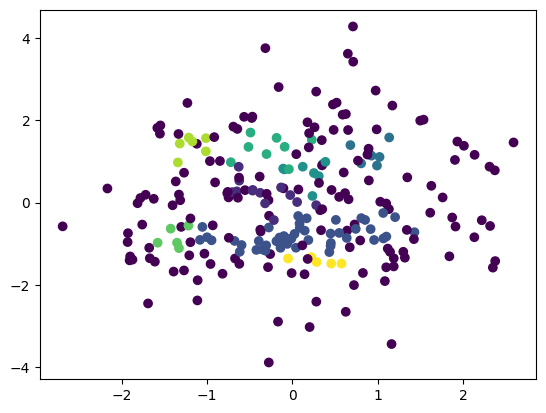

In [34]:
dbscan = DBSCAN().fit(data_x_3)
plt.scatter(data_x_3[:,0], data_x_3[:,1], c=dbscan.labels_)

In [35]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_3, dbscan.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_3, dbscan.labels_))
print("Индекс Rand:\t\t\t", rand_score(dbscan.labels_, data_y_3))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(dbscan.labels_, data_y_3))

Силуэт:				 -0.18439166154118472
Индекс Калинского-Харабаша:	 5.855347593068197
Индекс Rand:			 0.5203534136546185
Индекс Adjusted Rand:		 0.04003411884317185


# Gaussian Mixture

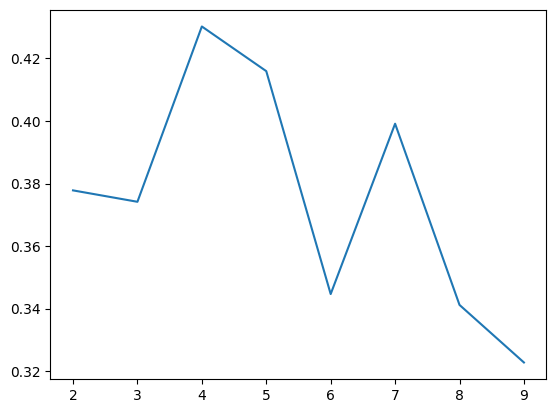

In [36]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data_x_1, GaussianMixture(n_components=i).fit(data_x_1).predict(data_x_1)))

plt.plot(range(2,10), ss)

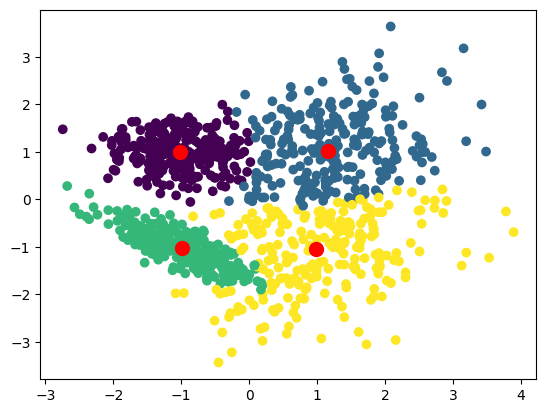

In [37]:
gm = GaussianMixture(n_components=4).fit(data_x_1)

gm.predict(data_x_1)

plt.scatter(data_x_1[:,0], data_x_1[:,1], c=gm.predict(data_x_1))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

In [38]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_1, gm.predict(data_x_1)))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_1, gm.predict(data_x_1)))
print("Индекс Rand:\t\t\t", rand_score(gm.predict(data_x_1), data_y_1))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(gm.predict(data_x_1), data_y_1))

Силуэт:				 0.4327753869889773
Индекс Калинского-Харабаша:	 931.6411303646662
Индекс Rand:			 0.6962082082082082
Индекс Adjusted Rand:		 0.39211190742459673


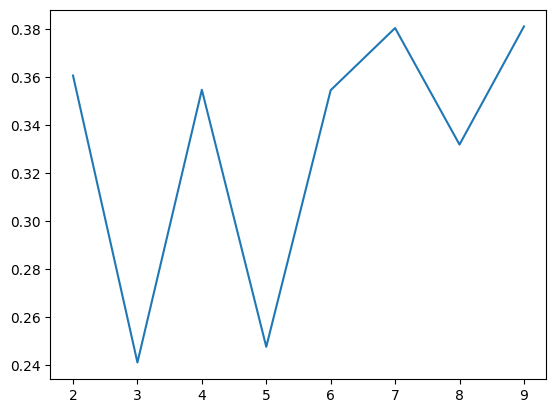

In [39]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data_x_2, GaussianMixture(n_components=i).fit(data_x_2).predict(data_x_2)))

plt.plot(range(2,10), ss)

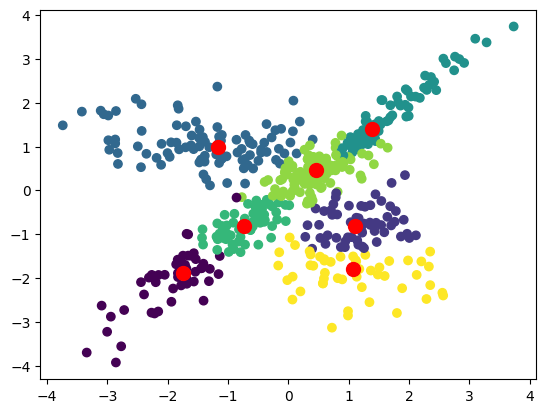

In [40]:
gm = GaussianMixture(n_components=7).fit(data_x_2)

gm.predict(data_x_2)

plt.scatter(data_x_2[:,0], data_x_2[:,1], c=gm.predict(data_x_2))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

In [41]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_2, gm.predict(data_x_2)))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_2, gm.predict(data_x_2)))
print("Индекс Rand:\t\t\t", rand_score(gm.predict(data_x_2), data_y_2))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(gm.predict(data_x_2), data_y_2))

Силуэт:				 0.3772809672884059
Индекс Калинского-Харабаша:	 411.67864061774003
Индекс Rand:			 0.5924569138276553
Индекс Adjusted Rand:		 0.18378768208061075


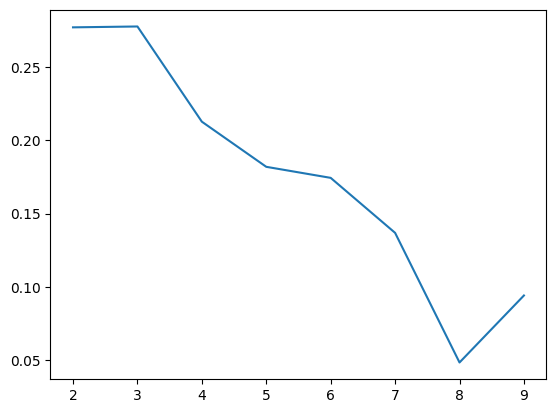

In [42]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data_x_3, GaussianMixture(n_components=i).fit(data_x_3).predict(data_x_3)))

plt.plot(range(2,10), ss)

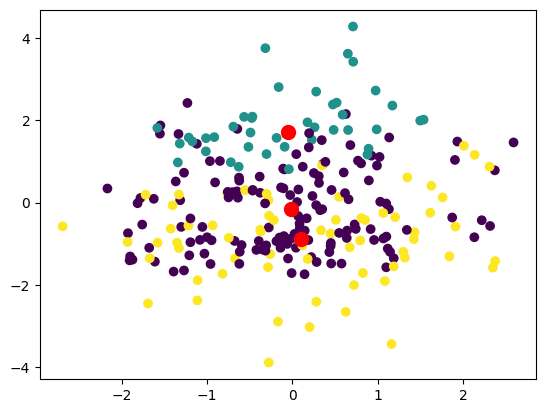

In [44]:
gm = GaussianMixture(n_components=3).fit(data_x_3)

gm.predict(data_x_3)

plt.scatter(data_x_3[:,0], data_x_3[:,1], c=gm.predict(data_x_3))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

In [45]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_3, gm.predict(data_x_3)))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_3, gm.predict(data_x_3)))
print("Индекс Rand:\t\t\t", rand_score(gm.predict(data_x_3), data_y_3))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(gm.predict(data_x_3), data_y_3))

Силуэт:				 0.27569330475870923
Индекс Калинского-Харабаша:	 100.22058850419192
Индекс Rand:			 0.5726907630522088
Индекс Adjusted Rand:		 0.14482528530355512


# Иерархическая кластеризация

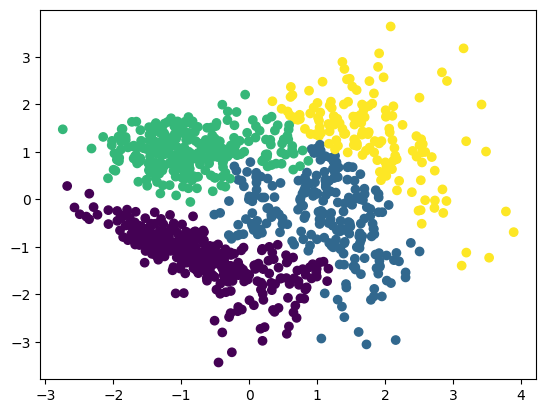

In [46]:
clustering = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(data_x_1)
plt.scatter(data_x_1[:,0], data_x_1[:,1], c=clustering.labels_)

In [47]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_1, clustering.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_1, clustering.labels_))
print("Индекс Rand:\t\t\t", rand_score(clustering.labels_, data_y_1))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(clustering.labels_, data_y_1))

Силуэт:				 0.40798113784137513
Индекс Калинского-Харабаша:	 793.6880824362103
Индекс Rand:			 0.7003263263263263
Индекс Adjusted Rand:		 0.4003777471540157


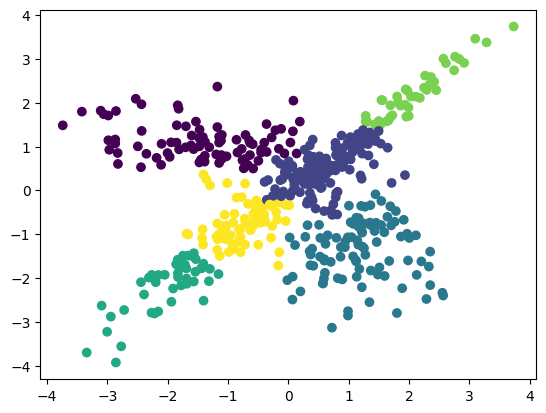

In [48]:
clustering = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(data_x_2)
plt.scatter(data_x_2[:,0], data_x_2[:,1], c=clustering.labels_)

In [49]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_2, clustering.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_2, clustering.labels_))
print("Индекс Rand:\t\t\t", rand_score(clustering.labels_, data_y_2))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(clustering.labels_, data_y_2))

Силуэт:				 0.43611518616078115
Индекс Калинского-Харабаша:	 486.08739584484556
Индекс Rand:			 0.6012344689378758
Индекс Adjusted Rand:		 0.20151668781844675


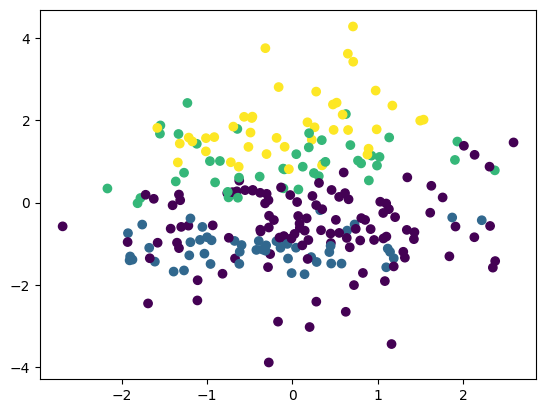

In [50]:
clustering = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(data_x_3)
plt.scatter(data_x_3[:,0], data_x_3[:,1], c=clustering.labels_)

In [51]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_3, clustering.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_3, clustering.labels_))
print("Индекс Rand:\t\t\t", rand_score(clustering.labels_, data_y_3))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(clustering.labels_, data_y_3))

Силуэт:				 0.2900357508183182
Индекс Калинского-Харабаша:	 103.730682695646
Индекс Rand:			 0.6076144578313253
Индекс Adjusted Rand:		 0.21399373942387295


# Своя модель

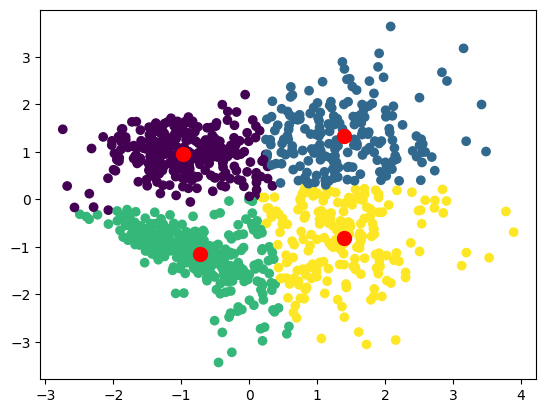

In [52]:
kmm = KMeansModel(n_clusters=4, n_features=2)
kmm.fit(data_x_1)

plt.scatter(data_x_1[:,0], data_x_1[:,1], c=kmm.labels_)
plt.scatter(kmm.cluster_centers_[:,0], kmm.cluster_centers_[:,1], s=100, c='red')

In [53]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_1, kmm.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_1, kmm.labels_))
print("Индекс Rand:\t\t\t", rand_score(kmm.labels_, data_y_1))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(kmm.labels_, data_y_1))

Силуэт:				 0.45732408770602895
Индекс Калинского-Харабаша:	 1039.0054645795167
Индекс Rand:			 0.6987507507507508
Индекс Adjusted Rand:		 0.39721285976579956


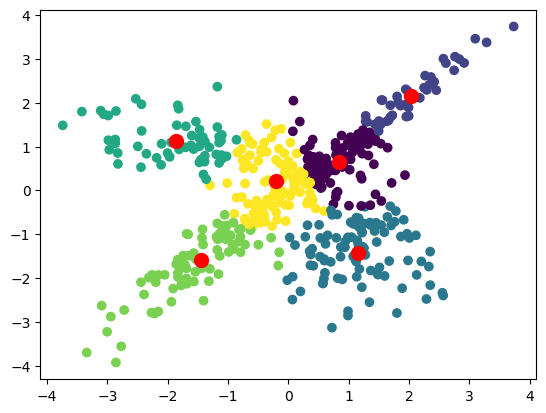

In [54]:
kmm = KMeansModel(n_clusters=6, n_features=2)
kmm.fit(data_x_2)

plt.scatter(data_x_2[:,0], data_x_2[:,1], c=kmm.labels_)
plt.scatter(kmm.cluster_centers_[:,0], kmm.cluster_centers_[:,1], s=100, c='red')

In [55]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_2, kmm.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_2, kmm.labels_))
print("Индекс Rand:\t\t\t", rand_score(kmm.labels_, data_y_2))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(kmm.labels_, data_y_2))

Силуэт:				 0.40416590598078245
Индекс Калинского-Харабаша:	 488.097688919249
Индекс Rand:			 0.5944128256513026
Индекс Adjusted Rand:		 0.18778565578533962


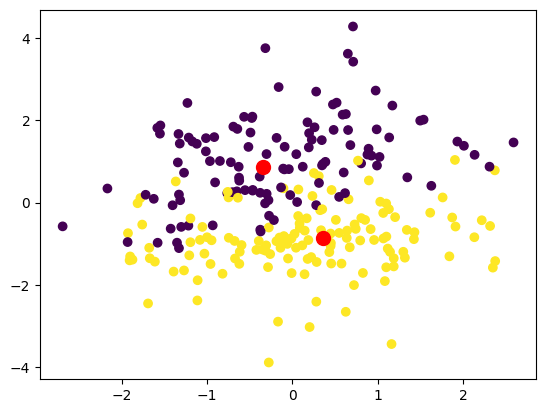

In [56]:
kmm = KMeansModel(n_clusters=2, n_features=3)
kmm.fit(data_x_3)

plt.scatter(data_x_3[:,0], data_x_3[:,1], c=kmm.labels_)
plt.scatter(kmm.cluster_centers_[:,0], kmm.cluster_centers_[:,1], s=100, c='red')

In [57]:
print("Силуэт:\t\t\t\t", silhouette_score(data_x_3, kmm.labels_))
print("Индекс Калинского-Харабаша:\t", calinski_harabasz_score(data_x_3, kmm.labels_))
print("Индекс Rand:\t\t\t", rand_score(kmm.labels_, data_y_3))
print("Индекс Adjusted Rand:\t\t", adjusted_rand_score(kmm.labels_, data_y_3))

Силуэт:				 0.2545978962317396
Индекс Калинского-Харабаша:	 101.66881862738205
Индекс Rand:			 0.6175421686746988
Индекс Adjusted Rand:		 0.23509173956801116
